In [1]:
from scipy.stats import zscore
import matplotlib.pyplot as plt
from data_import import ag_merged
import pandas as pd
import numpy as np
ag_merged

,Volume,% Change,TMAX,TMIN,TOTALPRCP,binned
Date,,,,,,
2007-01-05,27800,0.373134,62,53,0.03,Low
2007-01-08,143500,-0.082679,56,38,1.25,Med
2007-01-09,136700,-0.583333,44,34,0.00,Low
2007-01-10,76600,0.125523,36,29,0.00,Low
2007-01-11,160000,0.830220,38,26,0.00,Low
...,...,...,...,...,...,...
2017-11-06,855687,0.413223,66,46,0.01,Low
2017-11-07,404127,0.257732,49,40,0.70,Low
2017-11-08,327948,-0.257467,49,39,0.00,Low


In [2]:
cols = list(ag_merged.select_dtypes(include=np.number).columns)

for col in cols:
    col_zscore = col + ' Zscore'
    ag_merged[col_zscore] = (ag_merged[col] - ag_merged[col].mean())/ag_merged[col].std(ddof=0)
 

In [3]:
ag_merged

,Volume,% Change,TMAX,TMIN,TOTALPRCP,binned,Volume Zscore,% Change Zscore,TMAX Zscore,TMIN Zscore,TOTALPRCP Zscore
Date,,,,,,,,,,,
2007-01-05,27800,0.373134,62,53,0.03,Low,-1.031159,0.432864,-0.090421,0.222995,-0.264701
2007-01-08,143500,-0.082679,56,38,1.25,Med,-0.922039,-0.044500,-0.419767,-0.678374,0.217956
2007-01-09,136700,-0.583333,44,34,0.00,Low,-0.928452,-0.568826,-1.078460,-0.918739,-0.276570
2007-01-10,76600,0.125523,36,29,0.00,Low,-0.985134,0.173546,-1.517589,-1.219196,-0.276570
2007-01-11,160000,0.830220,38,26,0.00,Low,-0.906477,0.911561,-1.407807,-1.399470,-0.276570
...,...,...,...,...,...,...,...,...,...,...,...
2017-11-06,855687,0.413223,66,46,0.01,Low,-0.250355,0.474849,0.129144,-0.197644,-0.272614
2017-11-07,404127,0.257732,49,40,0.70,Low,-0.676234,0.312006,-0.804005,-0.558192,0.000365
2017-11-08,327948,-0.257467,49,39,0.00,Low,-0.748081,-0.227552,-0.804005,-0.618283,-0.276570


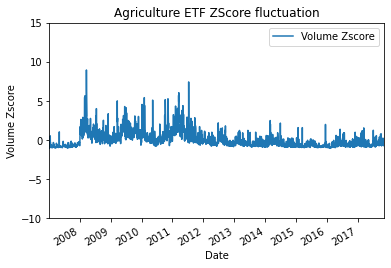

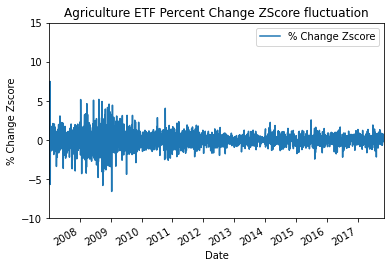

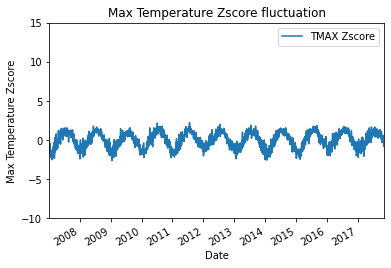

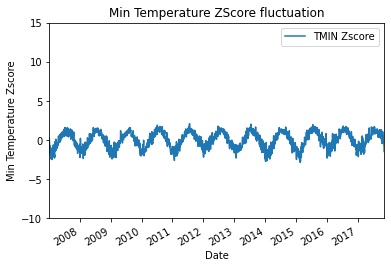

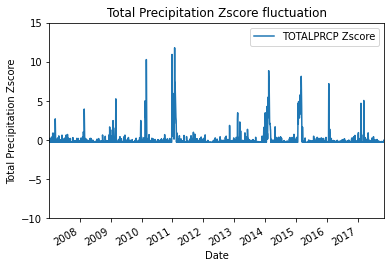

In [4]:
ag_merged.plot(y = "Volume Zscore")
plt.xlabel("Date")
plt.ylabel("Volume Zscore")
plt.title("Agriculture ETF ZScore fluctuation")
plt.axis([ag_merged.index.min(), ag_merged.index.max(), -10, 15])
plt.show()

ag_merged.plot(y = "% Change Zscore")
plt.xlabel("Date")
plt.ylabel("% Change Zscore")
plt.title("Agriculture ETF Percent Change ZScore fluctuation")
plt.axis([ag_merged.index.min(), ag_merged.index.max(), -10, 15])
plt.show()

ag_merged.plot(y = "TMAX Zscore")
plt.xlabel("Date")
plt.ylabel("Max Temperature Zscore")
plt.title("Max Temperature Zscore fluctuation")
plt.axis([ag_merged.index.min(), ag_merged.index.max(), -10, 15])
plt.show()

ag_merged.plot(y = "TMIN Zscore")
plt.xlabel("Date")
plt.ylabel("Min Temperature Zscore")
plt.title("Min Temperature ZScore fluctuation")
plt.axis([ag_merged.index.min(), ag_merged.index.max(), -10, 15])
plt.show()

ag_merged.plot(y = "TOTALPRCP Zscore")
plt.xlabel("Date")
plt.ylabel("Total Precipitation Zscore")
plt.title("Total Precipitation Zscore fluctuation")
plt.axis([ag_merged.index.min(), ag_merged.index.max(), -10, 15])
plt.show()


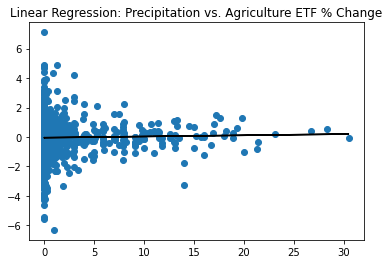

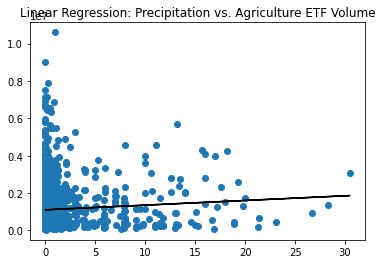

In [6]:
stock_volume = ag_merged['Volume'].values.reshape(-1,1)
stock_percent = ag_merged['% Change'].values.reshape(-1,1)
weather_precip = ag_merged['TOTALPRCP'].values.reshape(-1,1)
weather_max = ag_merged['TMAX'].values.reshape(-1,1)
weather_min = ag_merged['TMIN'].values.reshape(-1,1)

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  
linear_regressor.fit(weather_precip, stock_percent)  
Y_pred = linear_regressor.predict(weather_precip)
plt.scatter(weather_precip, stock_percent)
plt.plot(weather_precip, Y_pred, color='black')
plt.title("Linear Regression: Precipitation vs. Agriculture ETF % Change")
plt.show()
  
linear_regressor.fit(weather_precip, stock_volume)  
Y_pred = linear_regressor.predict(weather_precip)
plt.scatter(weather_precip, stock_volume)
plt.plot(weather_precip, Y_pred, color='black')
plt.title("Linear Regression: Precipitation vs. Agriculture ETF Volume")
plt.show()

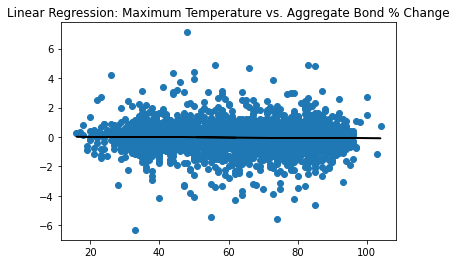

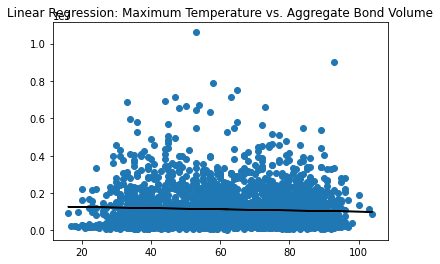

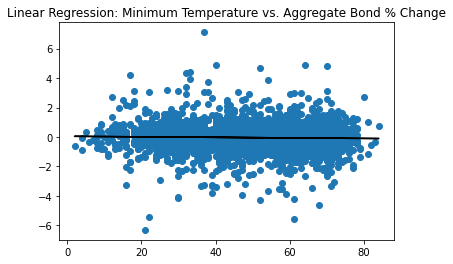

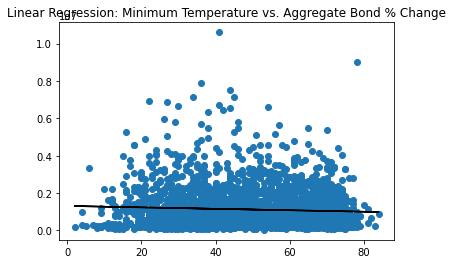

In [5]:
linear_regressor.fit(weather_max, stock_percent)  
Y_pred = linear_regressor.predict(weather_max) 
plt.scatter(weather_max, stock_percent)
plt.plot(weather_max, Y_pred, color='black')
plt.title("Linear Regression: Maximum Temperature vs. Agriculture ETF % Change")
plt.show()

linear_regressor.fit(weather_max, stock_volume)  
Y_pred = linear_regressor.predict(weather_max) 
plt.scatter(weather_max, stock_volume)
plt.plot(weather_max, Y_pred, color='black')
plt.title("Linear Regression: Maximum Temperature vs. Agriculture ETF Volume")
plt.show()

linear_regressor.fit(weather_min, stock_percent)  
Y_pred = linear_regressor.predict(weather_min) 
plt.scatter(weather_min, stock_percent)
plt.plot(weather_min, Y_pred, color='black')
plt.title("Linear Regression: Minimum Temperature vs. Agriculture ETF % Change")
plt.show()

linear_regressor.fit(weather_min, stock_volume)  
Y_pred = linear_regressor.predict(weather_min) 
plt.scatter(weather_min, stock_volume)
plt.plot(weather_min, Y_pred, color='black')
plt.title("Linear Regression: Minimum Temperature vs. Agriculture ETF Volume")
plt.show()